In [1]:
import tensorflow as tf
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt


2025-03-06 08:07:10.678814: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-06 08:07:10.690196: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741227730.703336    4337 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741227730.706898    4337 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 08:07:10.720496: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
model = tf.keras.applications.ResNet50(weights ='imagenet')

2025-03-06 08:07:13.836056: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
images = load_sample_images()['images']
images_resized = tf.keras.layers.Resizing(height=224,width=224,crop_to_aspect_ratio=True)(images)

In [4]:
#proprecessing the imputs using model preprocess_imput() 
inputs = tf.keras.applications.resnet50.preprocess_input(images_resized)

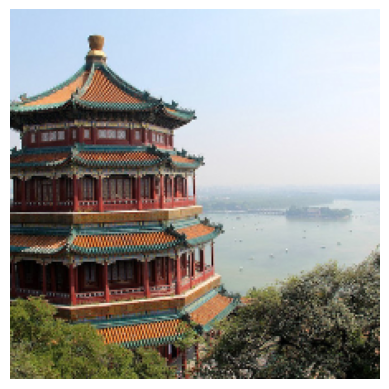

In [5]:
plt.axis('off')
plt.imshow(images_resized[0])

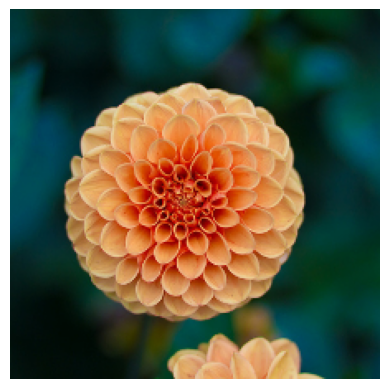

In [6]:
plt.axis('off')
plt.imshow(images_resized[1])

In [7]:
len(images_resized)

2

In [8]:
y_proba = model.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [9]:
y_proba.shape

(2, 1000)

In [10]:
top_k = tf.keras.applications.resnet50.decode_predictions(y_proba,top=3)
for image_index in range(len(images)):
    print(f'Image #{image_index}')
    for class_id, name,y_proba in top_k[image_index]:
        print(f'{class_id} - {name:12s} {y_proba:.2%}')

Image #0
n03598930 - jigsaw_puzzle 30.68%
n02782093 - balloon      17.17%
n03888257 - parachute    5.57%
Image #1
n04209133 - shower_cap   34.37%
n09229709 - bubble       11.41%
n02782093 - balloon      9.46%
